Wykresy:
1.wykres korelacji poszczególnych kolumn

Dane:
Zbędne dane: ID(nie ma adnego znaczenia), year(wszystkie dane mają ten sam rok)
Dane kienta zgłaszającego się o kredyt:
>> Gender
>> loan_type
>> loan_purpose
>> open_credit
>> business_or_commercial
>> loan_amount 
>> term
>> property_value
>> construction_type
>> occupancy_type
>> Secured_by


- total_units
- income
- credit_type
- Credit_Score
- co-applicant_credit_type
- age
- submission_of_application
- LTV (loan to value ratio)
- Region
- Security_Type
Dane wynikające z informacji od klienta:
- dtir1
- loan_limit
- Credit_Worthiness
- rate_of_interest
- Interest_rate_spread
- Upfront_charges
- Neg_ammortization
- interest_only
- lump_sum_payment
Dane Końcowe:
- approv_in_adv
- Status

# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [5]:
df = pd.read_csv("../../data/Loan_Default.csv")

# Basic Data informations

In [5]:
print(f"Number of columns: {df.shape[1]}\n")
print(f"Column names and thier data types:\n {df.dtypes}")

Number of columns: 34

Column names and thier data types:
 ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score    

In [6]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


By printing unique values for each column we realised, that data is for only one year, so it is irrelevant for further analysis

In [7]:
for col in df:
    print(f"{col}: {df[col].unique()}")

ID: [ 24890  24891  24892 ... 173557 173558 173559]
year: [2019]
loan_limit: ['cf' nan 'ncf']
Gender: ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv: ['nopre' 'pre' nan]
loan_type: ['type1' 'type2' 'type3']
loan_purpose: ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness: ['l1' 'l2']
open_credit: ['nopc' 'opc']
business_or_commercial: ['nob/c' 'b/c']
loan_amount: [ 116500  206500  406500  456500  696500  706500  346500  266500  376500
  436500  136500  466500  226500   76500  356500  156500  586500  306500
  316500  336500  426500  476500  196500  186500  246500  216500  506500
  656500  256500  396500  166500  236500  866500  416500  386500  596500
  606500   86500  286500  146500  446500  636500  486500  326500   56500
  906500  496500  106500  126500  296500  176500 1376500  566500  686500
  556500  676500  366500  276500  716500   66500  616500   96500  826500
   26500  666500  546500  986500  526500 1226500  726500 1486500 1416500
  536500  796500  516500   46500  876500  57

In [8]:
df.isnull().sum() 

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

NOT IMPORTTANT VALUES

ID, Year, 
Status, value we possibly want to predict
Check if we can remove Null values just like that.


In [10]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
data = df.copy()
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
for col in cat_cols:
    unique_values = data[col].dropna().unique()
    unique_values_na = data[col].unique()
    value_mapping = {value: num for num, value in enumerate(unique_values)}
    data[col] = data[col].map(value_mapping)
    print(f"values for col {col} converted from {unique_values_na} to {data[col].unique()}")

values for col loan_limit converted from ['cf' nan 'ncf'] to [ 0. nan  1.]
values for col Gender converted from ['Sex Not Available' 'Male' 'Joint' 'Female'] to [0 1 2 3]
values for col approv_in_adv converted from ['nopre' 'pre' nan] to [ 0.  1. nan]
values for col loan_type converted from ['type1' 'type2' 'type3'] to [0 1 2]
values for col loan_purpose converted from ['p1' 'p4' 'p3' 'p2' nan] to [ 0.  1.  2.  3. nan]
values for col Credit_Worthiness converted from ['l1' 'l2'] to [0 1]
values for col open_credit converted from ['nopc' 'opc'] to [0 1]
values for col business_or_commercial converted from ['nob/c' 'b/c'] to [0 1]
values for col Neg_ammortization converted from ['not_neg' 'neg_amm' nan] to [ 0.  1. nan]
values for col interest_only converted from ['not_int' 'int_only'] to [0 1]
values for col lump_sum_payment converted from ['not_lpsm' 'lpsm'] to [0 1]
values for col construction_type converted from ['sb' 'mh'] to [0 1]
values for col occupancy_type converted from ['pr' '

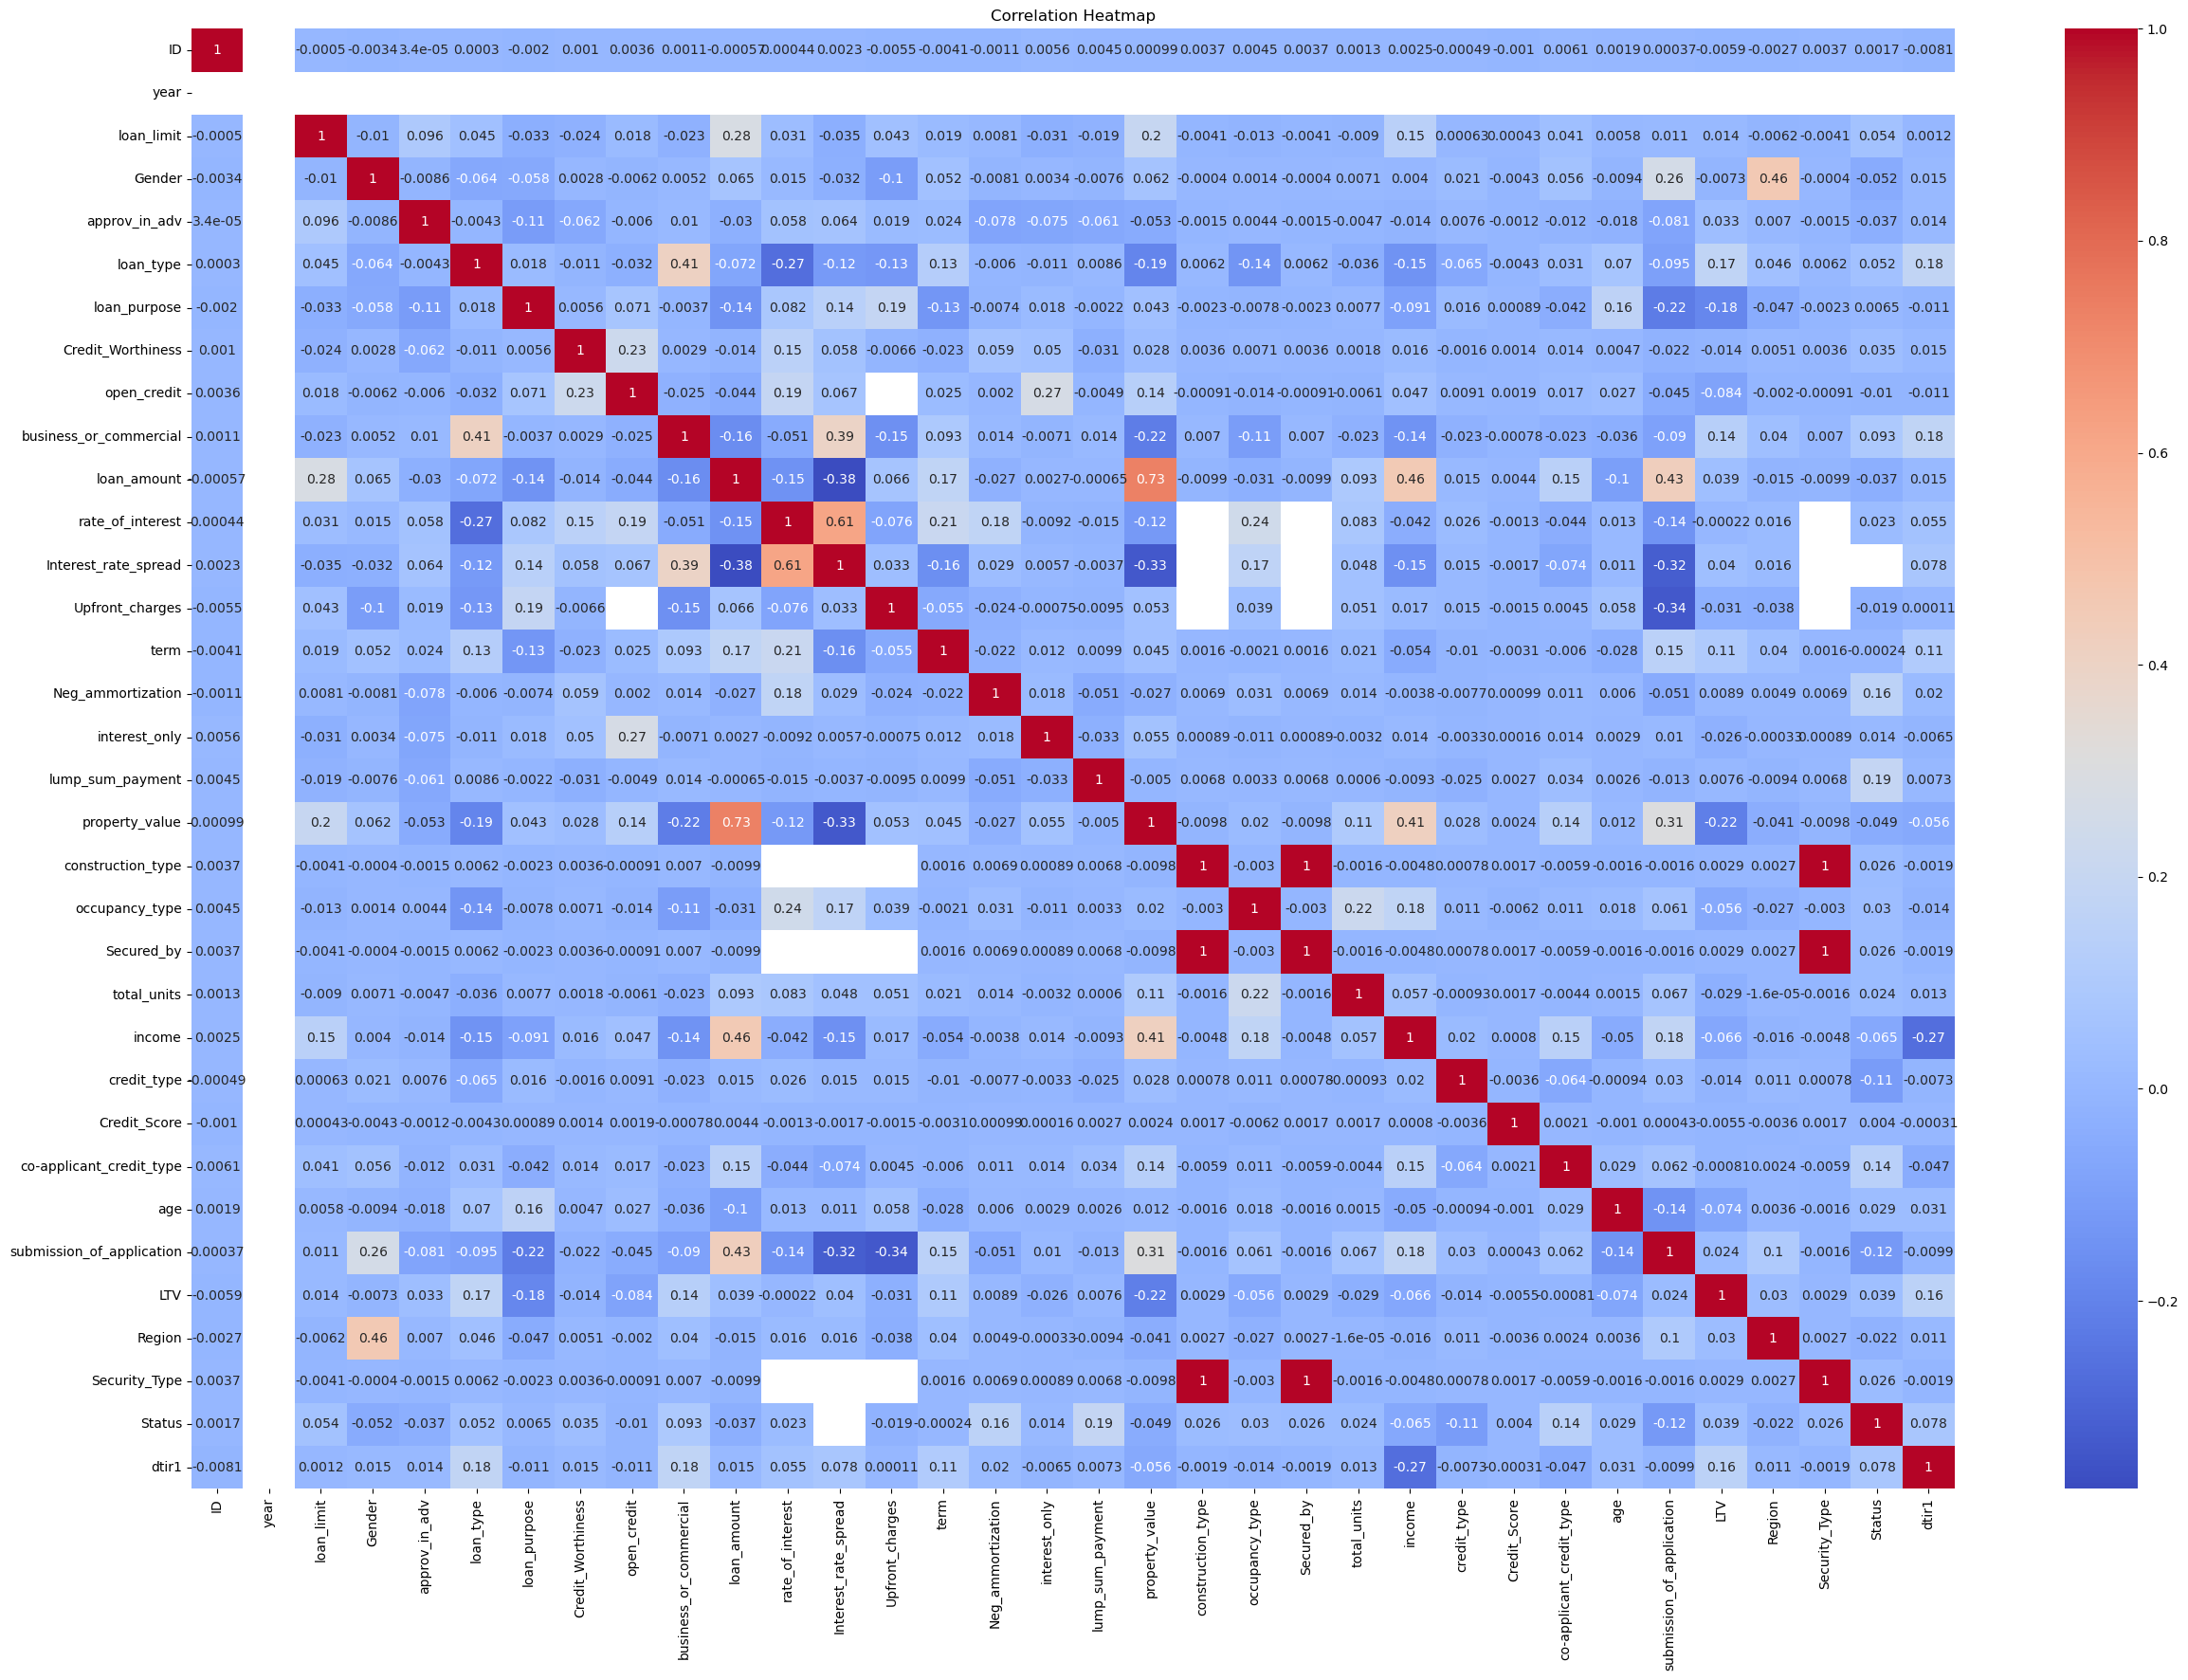

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Demographics

<Axes: xlabel='Gender', ylabel='count'>

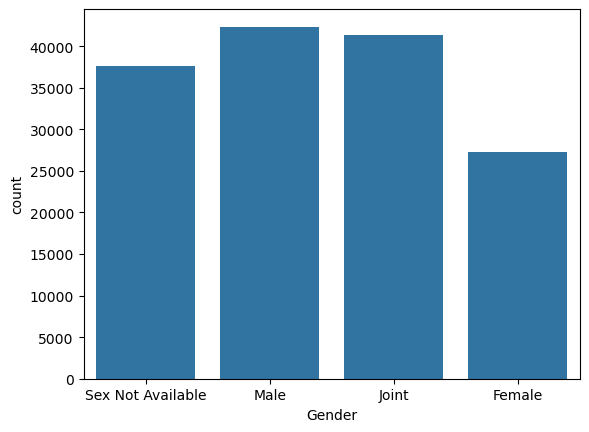

In [ ]:
sns.countplot(df, x='Gender')

<Axes: xlabel='age', ylabel='count'>

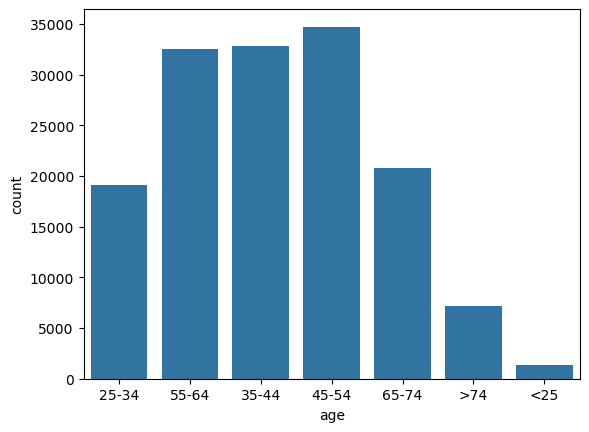

In [ ]:
sns.countplot(df, x='age')

<Axes: xlabel='loan_type', ylabel='count'>

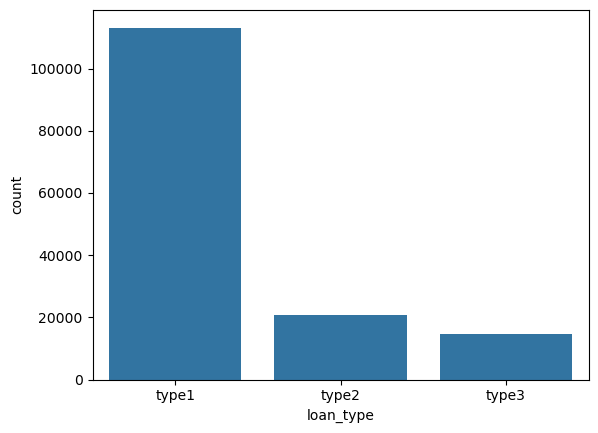

In [ ]:
sns.countplot(df, x='loan_type')

<Axes: xlabel='loan_purpose', ylabel='count'>

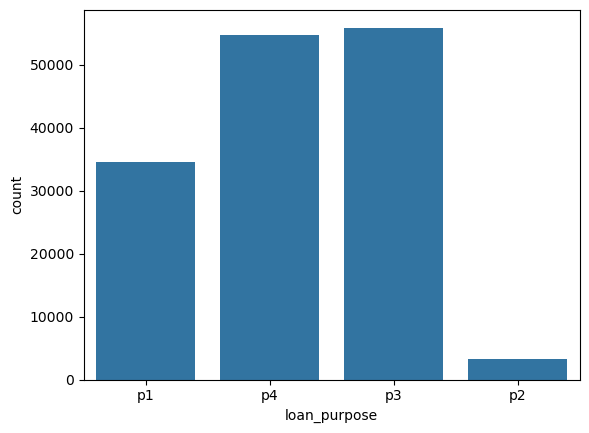

In [ ]:
sns.countplot(df, x='loan_purpose')

<Axes: xlabel='business_or_commercial', ylabel='count'>

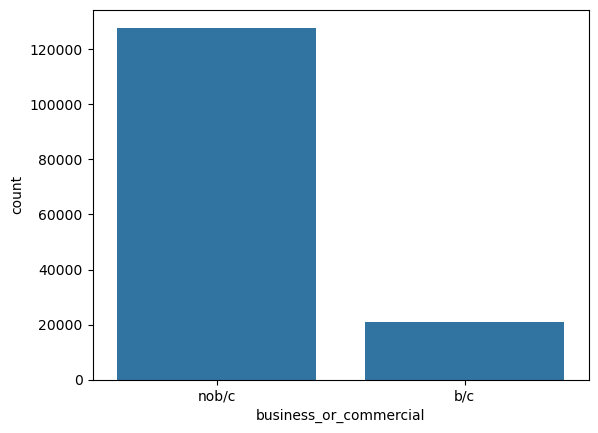

In [ ]:
sns.countplot(df, x='business_or_commercial')

# Creditworthiness vs Loan Amount and Approval Status

Type of credit worthiness doesnt have big imacto on credit loan, but l2 type have 8% more approval rate

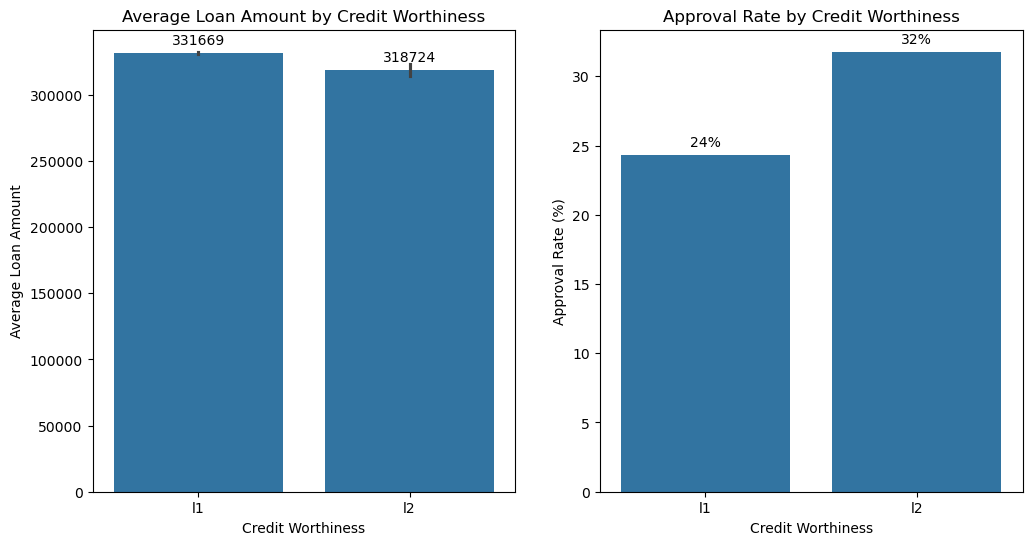

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(data=df, x='Credit_Worthiness', y='loan_amount', estimator='mean')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Average Loan Amount by Credit Worthiness')
plt.ylabel('Average Loan Amount')
plt.xlabel('Credit Worthiness')

plt.subplot(1, 2, 2)
approval_data = df.groupby('Credit_Worthiness')['Status'].mean().reset_index(name='approval_rate')
approval_data['approval_rate'] *= 100 
ax = sns.barplot(data=approval_data, x='Credit_Worthiness', y='approval_rate')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Approval Rate by Credit Worthiness')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Credit Worthiness')

plt.show()

# Loan Type vs Interest Rates

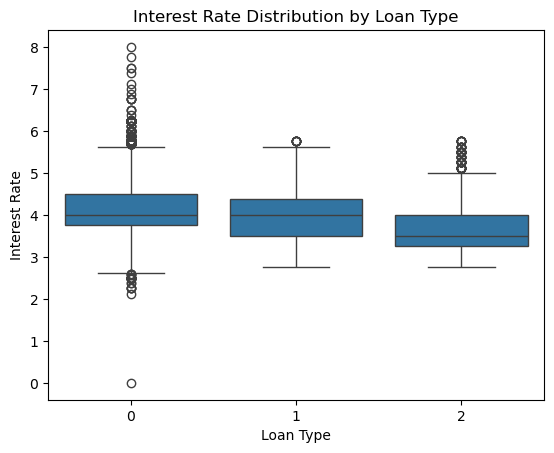

In [ ]:
sns.boxplot(data=df, x='loan_type', y='rate_of_interest')
plt.title('Interest Rate Distribution by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Interest Rate')
plt.show()

# Loan type vs Loan Amount and Approval Status

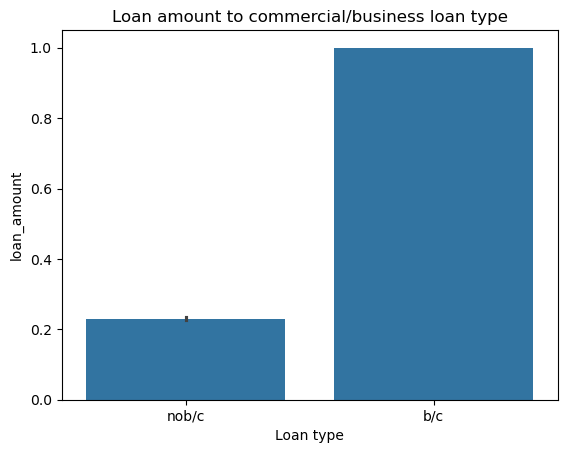

In [ ]:
sns.barplot(data=df, x='business_or_commercial', y='loan_amount')
plt.title('Loan amount to commercial/business loan type')
plt.xlabel('Loan type')
plt.ylabel('loan_amount')
plt.show()

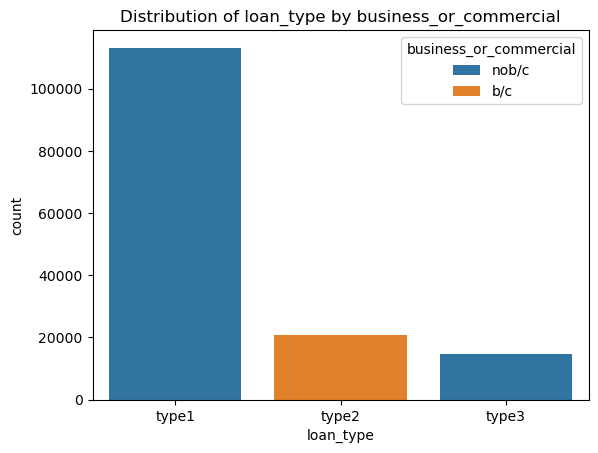

In [ ]:
sns.countplot(data=df, x='loan_type', hue='business_or_commercial')
plt.title('Distribution of loan_type by business_or_commercial')
plt.show()

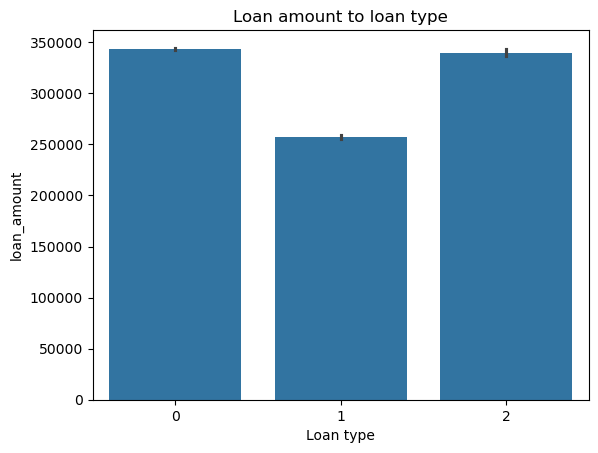

In [ ]:
sns.barplot(data=df, x='loan_type', y='loan_amount')
plt.title('Loan amount to loan type')
plt.xlabel('Loan type')
plt.ylabel('loan_amount')
plt.show()

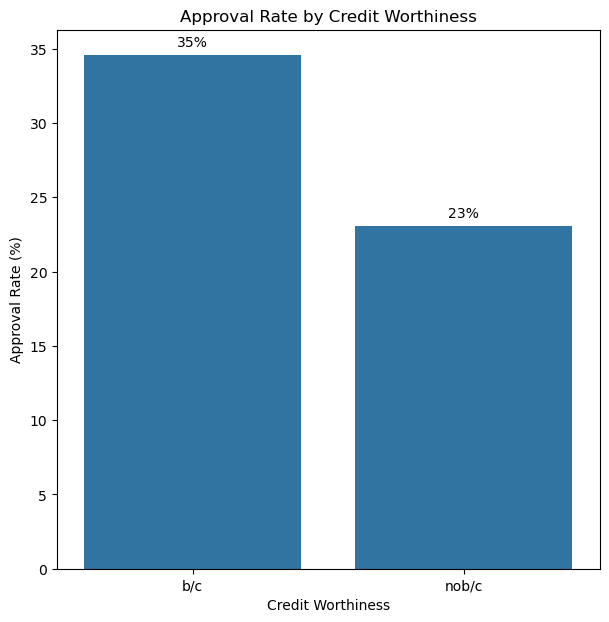

In [ ]:
plt.figure(figsize=(7, 7))
approval_data = df.groupby('business_or_commercial')['Status'].mean().reset_index(name='approval_rate')
approval_data['approval_rate'] *= 100
ax = sns.barplot(data=approval_data, x='business_or_commercial', y='approval_rate')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Approval Rate by buisness/commercial loan type')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Loan Type')

plt.show()

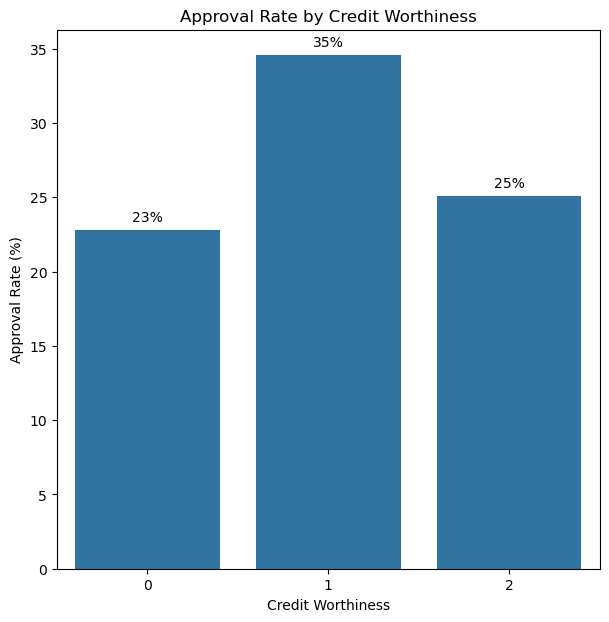

In [ ]:
plt.figure(figsize=(7, 7))
approval_data = df.groupby('loan_type')['Status'].mean().reset_index(name='approval_rate')
approval_data['approval_rate'] *= 100
ax = sns.barplot(data=approval_data, x='loan_type', y='approval_rate')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Approval Rate by loan Type')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Loan type')

plt.show()

# Loan Purpose vs Loan Amount and Approval Status
Hypothesis: Business loans or commercial purposes may have stricter conditions or higher amounts compared to personal loans.
Analysis:
Compare loan_purpose with loan_amount, term, and Status.

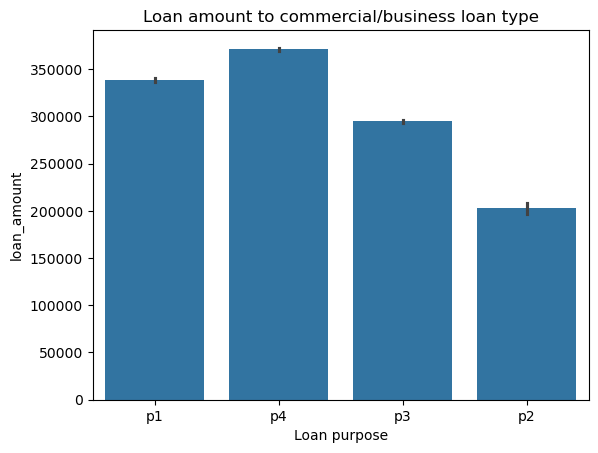

In [ ]:
sns.barplot(data=df, x='loan_purpose', y='loan_amount')
plt.title('Loan amount to laon purpose')
plt.xlabel('Loan purpose')
plt.ylabel('loan amount')
plt.show()

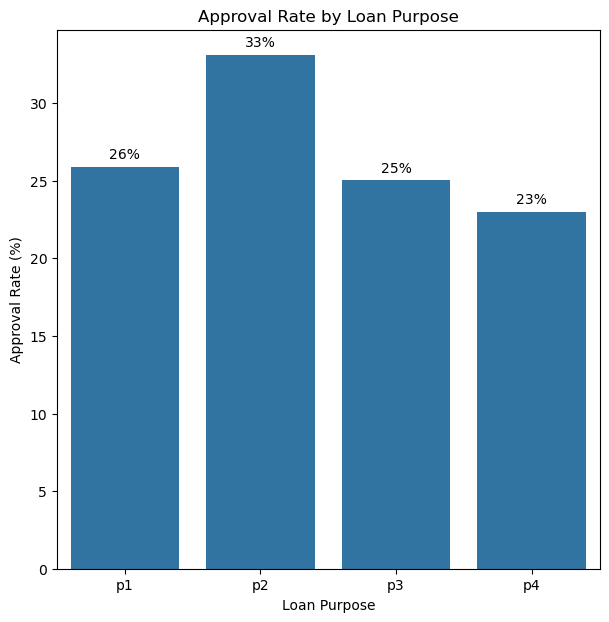

In [ ]:
plt.figure(figsize=(7, 7))
approval_data = df.groupby('loan_purpose')['Status'].mean().reset_index(name='approval_rate')
approval_data['approval_rate'] *= 100
ax = sns.barplot(data=approval_data, x='loan_purpose', y='approval_rate')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Approval Rate by Loan Purpose')
plt.ylabel('Approval Rate (%)')
plt.xlabel('Loan Purpose')

plt.show()

# Open credit vs. Credit Worthiness

In [ ]:
data = df.copy()

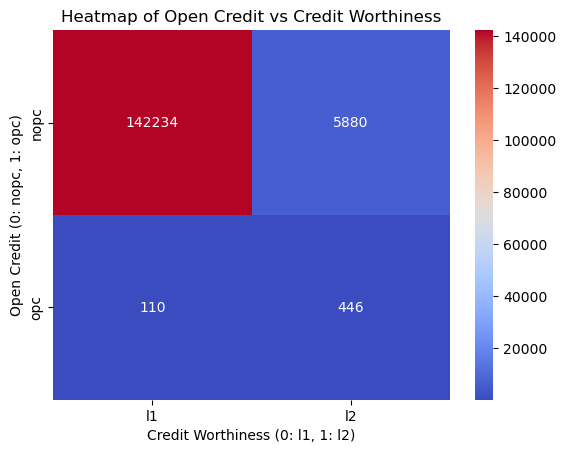

In [ ]:
pivot_table = pd.crosstab(data['open_credit'], data['Credit_Worthiness'])
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title("Heatmap of Open Credit vs Credit Worthiness")
plt.xlabel("Credit Worthiness (0: l1, 1: l2)")
plt.ylabel("Open Credit (0: nopc, 1: opc)")
plt.show()

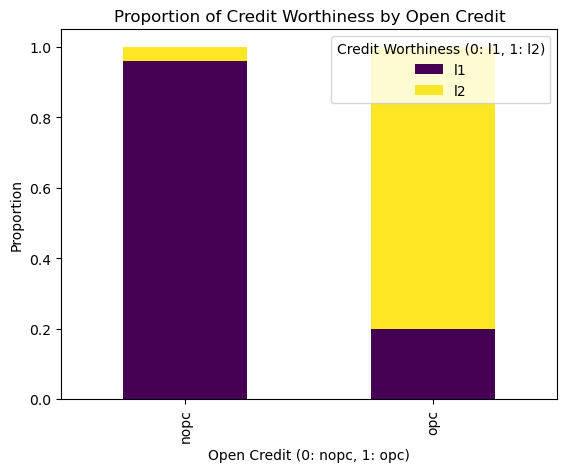

In [ ]:
grouped = data.groupby(['open_credit', 'Credit_Worthiness']).size().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0)
grouped.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Proportion of Credit Worthiness by Open Credit")
plt.xlabel("Open Credit (0: nopc, 1: opc)")
plt.ylabel("Proportion")
plt.legend(title="Credit Worthiness (0: l1, 1: l2)")
plt.show()

# Open credit vs. interest rate

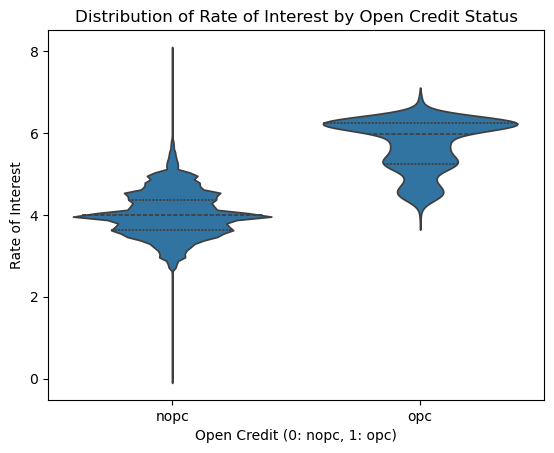

In [7]:
sns.violinplot(data=df, x='open_credit', y='rate_of_interest', inner='quartile')
plt.title("Distribution of Rate of Interest by Open Credit Status")
plt.xlabel("Open Credit (0: nopc, 1: opc)")
plt.ylabel("Rate of Interest")
plt.show()

# Open credit vs property value
are people with open credit are taking higher loans

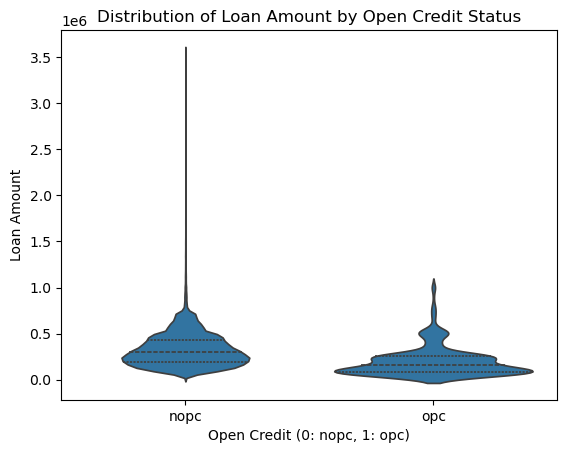

In [21]:
sns.violinplot(data=df, x='open_credit', y='loan_amount', inner='quartile')
plt.title("Distribution of Loan Amount by Open Credit Status")
plt.xlabel("Open Credit (0: nopc, 1: opc)")
plt.ylabel("Loan Amount")
plt.show()

# Loan Duration vs. rate of interest

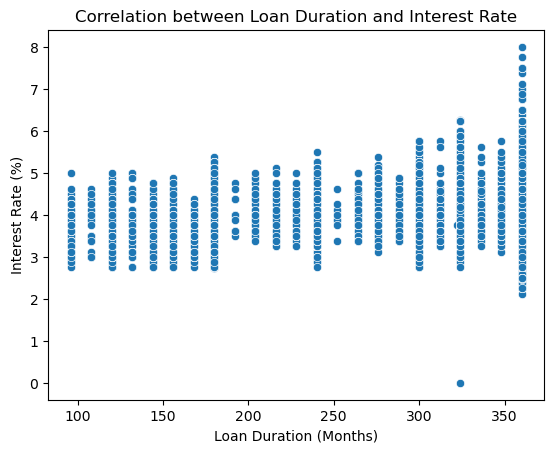

In [25]:
sns.scatterplot(data=df, x='term', y='rate_of_interest')
plt.title('Correlation between Loan Duration and Interest Rate')
plt.xlabel('Loan Duration (Months)')
plt.ylabel('Interest Rate (%)')
plt.show()

# Property value

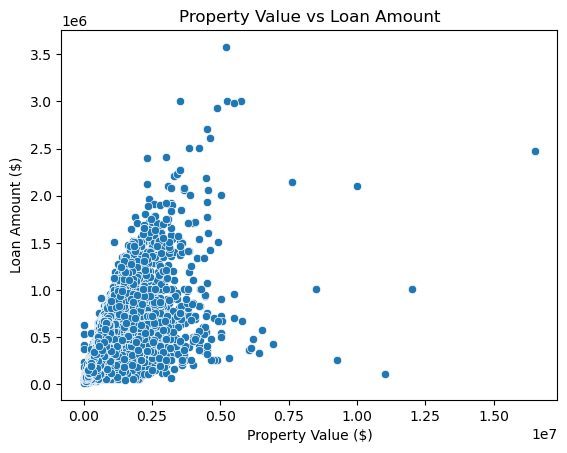

In [32]:
sns.scatterplot(data=df, x='property_value', y='loan_amount')
plt.title('Property Value vs Loan Amount')
plt.xlabel('Property Value ($)')
plt.ylabel('Loan Amount ($)')
plt.show()

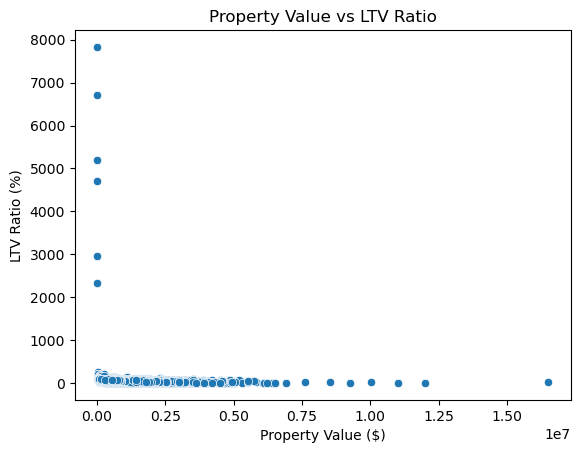

In [33]:
sns.scatterplot(data=df, x='property_value', y='LTV')
plt.title('Property Value vs LTV Ratio')
plt.xlabel('Property Value ($)')
plt.ylabel('LTV Ratio (%)')
plt.show()

# Construction Type

In [42]:
group_count = df.groupby('construction_type').size()
print(group_count)

construction_type
mh        33
sb    148637
dtype: int64


# occupancy_type

In [44]:
data = df.copy()
data['occupancy_type'] = pd.Categorical(data['occupancy_type'], categories=['pr', 'sr', 'ir'])
data['total_units'] = pd.Categorical(data['total_units'], categories=['1U', '2U', '3U', '4U'])

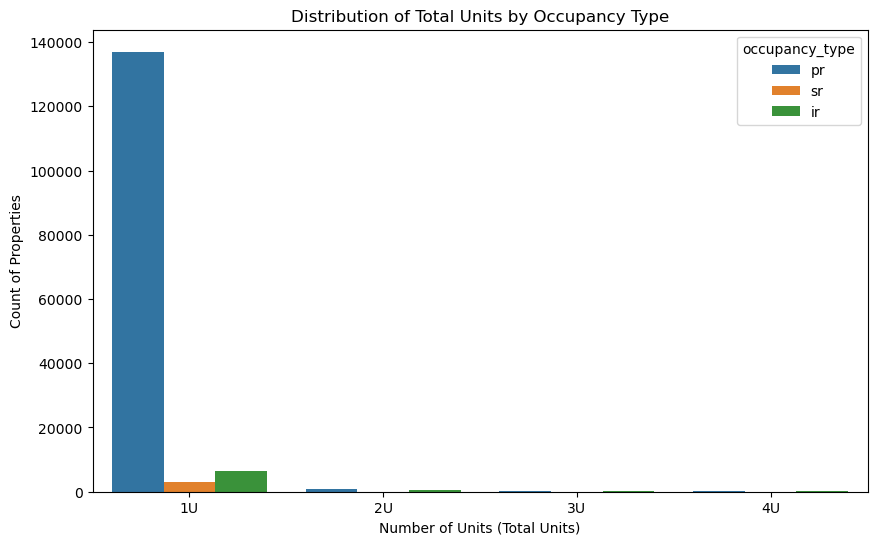

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='total_units', hue='occupancy_type', data=df)
plt.title("Distribution of Total Units by Occupancy Type")
plt.xlabel("Number of Units (Total Units)")
plt.ylabel("Count of Properties")
plt.show()

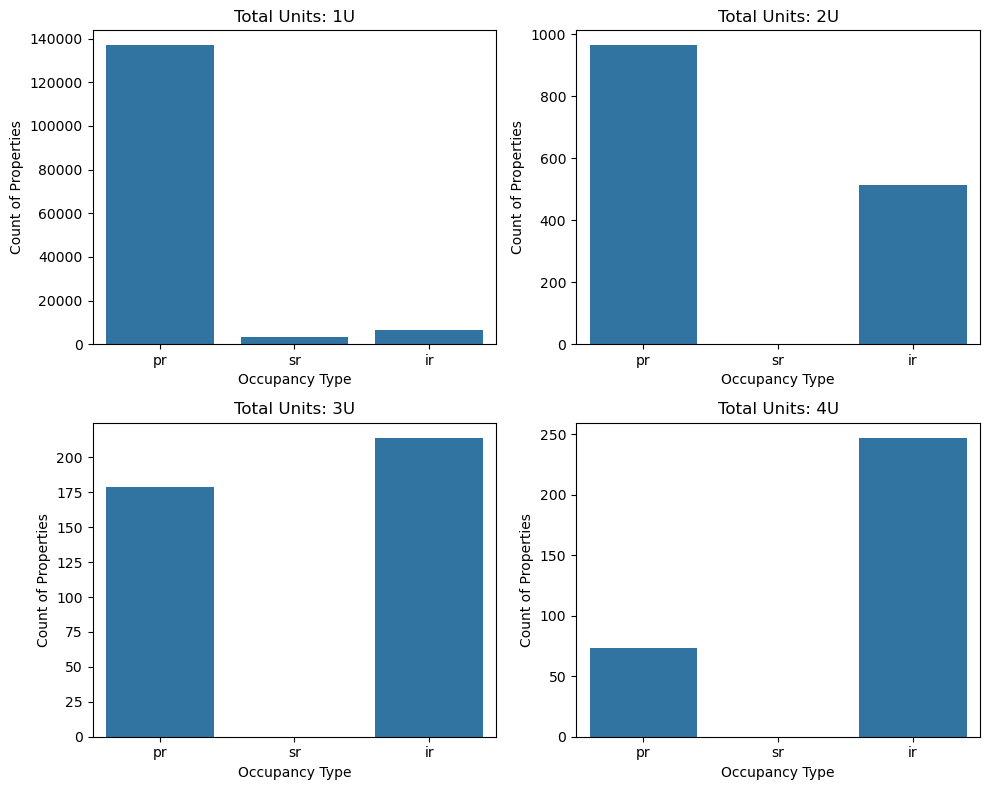

In [ ]:
unit_types = df['total_units'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, unit in enumerate(unit_types):
    ax = axes[i]
    subset = df[df['total_units'] == unit]
    sns.countplot(x='occupancy_type', data=subset, ax=ax, order=['pr', 'sr', 'ir'])
    ax.set_title(f"Total Units: {unit}")
    ax.set_xlabel("Occupancy Type")
    ax.set_ylabel("Count of Properties")

plt.tight_layout()
plt.show()

Contingency Table:
construction_type  mh      sb
Secured_by                   
home                0  148637
land               33       0


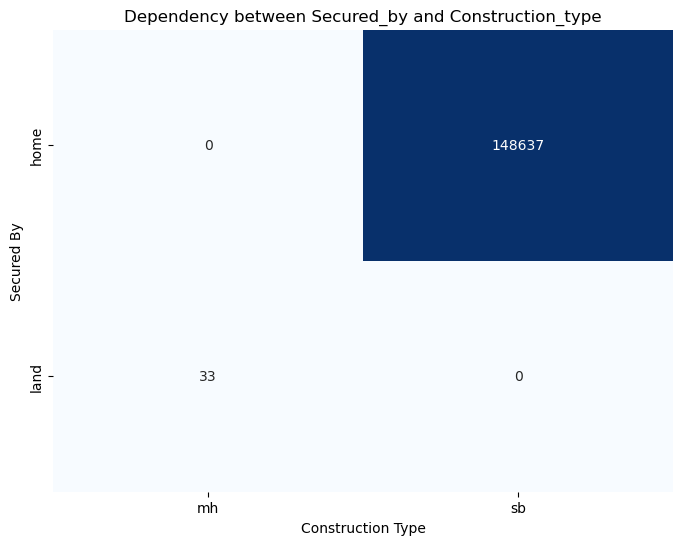

In [ ]:
contingency_table = pd.crosstab(df['Secured_by'], df['construction_type'])
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Dependency between Secured_by and Construction_type")
plt.xlabel("Construction Type")
plt.ylabel("Secured By")
plt.show()